<a href="https://colab.research.google.com/github/talhaanwarch/ODIR2019/blob/master/ghina_mam_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TODO
*cross check the implementation by some one expert

#heling material
https://github.com/ivashnyov/ODIR/issues/1  
https://github.com/nnnnew/ODIR  
https://github.com/DecentMakeover/odir_winningsubmission

# read data from directory

In [2]:
#connect drive with colab notebook
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#show content in working directory
ls

drive/  sample_data/


In [0]:
#cd drive/My\ Drive/ghina/thesis

#extract data

In [0]:
import pandas as pd

In [6]:
#following are libraries to unpack 7z file
!pip install patool 
!pip install pyunpack
from pyunpack import Archive

     |████████████████████████████████| 81kB 4.3MB/s 
  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5162 sha256=4c07d94679472aad88048253e3cc9bcca793e34bd98dd775760f60e3456870bd
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


In [0]:
#create a folder name as data
!mkdir data

In [0]:
#path where our data is saved
path='/content/drive/My Drive/ghina/thesis/'

In [0]:
#extract the 7z file in data folder we created above
#this not only extract the data but move it from drive to colab for efficinet processing
#it will take some time
Archive(path+'ODIR-5K_Training_Images.7z').extractall('data')

In [0]:
#read the annottion file
annotation=pd.read_excel(path+'ODIR-5K_Training_Annotations(Updated)_V2.xlsx')

In [0]:
#normal (N), diabetes (D), glaucoma (G), cataract (C), AMD (A), hypertension (H), myopia (M) and other diseases/abnormalities (O) 

In [12]:
#print first 5 rows of annotation file
annotation.head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1
7,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
8,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
9,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1


In [13]:
annotation['Left-Diagnostic Keywords'].value_counts().head(30)

normal fundus                                                      1433
moderate non proliferative retinopathy                              366
mild nonproliferative retinopathy                                   220
cataract                                                            135
pathological myopia                                                 111
lens dust，normal fundus                                             110
glaucoma                                                            104
dry age-related macular degeneration                                 93
severe nonproliferative retinopathy                                  70
drusen                                                               66
epiretinal membrane                                                  54
hypertensive retinopathy                                             53
macular epiretinal membrane                                          49
normal fundus，lens dust                                         

In [14]:
annotation['Right-Diagnostic Keywords'].value_counts().head(30)

normal fundus                                                         1383
moderate non proliferative retinopathy                                 379
mild nonproliferative retinopathy                                      240
cataract                                                               127
pathological myopia                                                    116
lens dust，normal fundus                                                112
dry age-related macular degeneration                                   103
glaucoma                                                                96
severe nonproliferative retinopathy                                     74
drusen                                                                  72
macular epiretinal membrane                                             71
epiretinal membrane                                                     55
hypertensive retinopathy                                                51
myelinated nerve fibers  

#read single image

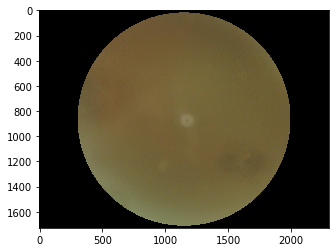

In [125]:
#read a single image from data and display it
import cv2 #for reading images
import matplotlib.pyplot as plt # for displaying images

image=cv2.imread('data/ODIR-5K_Training_Dataset/0_left.jpg')
#cv2 read image in BGR format, and plt displaying image in RGB format. SO we need to convert BGR2RGB
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
plt.imshow(image) #display image


## Auto crop image

In [0]:
#https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


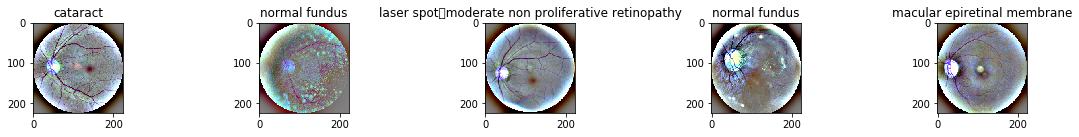

In [146]:
fig,ax=plt.subplots(1,5,figsize=(15,15))
for i,j in zip(range(0,5),annotation['Left-Diagnostic Keywords']):
  image=cv2.imread('data/ODIR-5K_Training_Dataset/{}_left.jpg'.format(i+1))
  #cv2 read image in BGR format, and plt displaying image in RGB format. SO we need to convert BGR2RGB
  image = crop_image_from_gray(image)
  image = cv2.resize(image, (224, 224))
  image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX=15) ,-4 ,128)
  ax[i].imshow(image,cmap='gray') #display image
  ax[i].title.set_text(j)
  fig.tight_layout()


In [16]:
#now read all image in left fundus column
for img_file,disease in zip(annotation['Left-Fundus'],annotation['Left-Diagnostic Keywords'])	:
  print(img_file,disease)
  break

0_left.jpg cataract


#read all images

In [0]:
#create  list where we can store image , 
#this will take some time
left_images=[]
for img_file in (annotation['Left-Fundus'])	:
  image=cv2.imread('data/ODIR-5K_Training_Dataset/{}'.format(img_file))#read image
  image = crop_image_from_gray(image)
  image = cv2.resize(image, (224, 224))
  image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX=10) ,-4 ,128)
  left_images.append(image)#append image in above create list of images
  

In [0]:
#create  list where we can store image , 
#this will take some time
right_images=[]
for img_file in (annotation['Right-Fundus'])	:
  image=cv2.imread('data/ODIR-5K_Training_Dataset/{}'.format(img_file))#read image
  image = crop_image_from_gray(image)
  image = cv2.resize(image, (224, 224))
  image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX=10) ,-4 ,128)
  right_images.append(image)#append image in above create list of images
  

In [149]:
left_images[0].shape

(224, 224, 3)

In [0]:
labels=annotation.iloc[:,-8::]

In [151]:
labels.head()

,N,D,G,C,A,H,M,O
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


In [0]:
#conver the images list to array so we can feed it to neural net
import numpy as np
XL=np.array(left_images)
XR=np.array(right_images)
y=np.array(labels)

In [153]:
XL.shape,XR.shape,y.shape

((3500, 224, 224, 3), (3500, 224, 224, 3), (3500, 8))

#split data

In [0]:
# #save variables in drive, so next we can load them directly
# np.save(path+'X.npy',X)
# np.save(path+'y.npy',y)

In [0]:
#split data
from sklearn.model_selection import train_test_split
XL_train, XL_val, yL_train, yL_val = train_test_split(XL, y, test_size=0.33, random_state=42)
XR_train, XR_val, yR_train, yR_val = train_test_split(XR, y, test_size=0.33, random_state=42)

In [156]:
len(yL_val),len(yR_val)

(1155, 1155)

In [157]:
sum(XL_val==XR_val).any()

True

#Date generator

In [0]:
BATCH_SIZE=32

In [0]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               vertical_flip=False,
                               fill_mode='nearest'# Fill in missing pixels with the nearest filled value
                                )
val_datagen=ImageDataGenerator(rescale=1/255)

In [0]:
def multi_train_gen(gen,XR_train,XL_train,yR_train,yL_train):
  XR_generator = train_datagen.flow(XR_train, yR_train, batch_size=BATCH_SIZE)
  XL_generator = train_datagen.flow(XL_train, yL_train, batch_size=BATCH_SIZE)
  while True:
    X1i = XR_generator.next()
    X2i = XL_generator.next()
    yield [X1i[0], X2i[0]], X2i[1] 

In [0]:
input_gen=multi_train_gen(train_datagen,XR_train,XL_train,yR_train,yL_train)    

In [0]:
def multi_val_gen(gen,XR_val,XL_val,yR_val,yL_val):
  vR_generator = val_datagen.flow(XR_val, yR_val, batch_size=BATCH_SIZE)
  vL_generator = val_datagen.flow(XL_val, yL_val, batch_size=BATCH_SIZE)

  while True:
    X1i = vR_generator.next()
    X2i = vL_generator.next()
    yield [X1i[0], X2i[0]], X2i[1] 

In [0]:
val_gen=multi_val_gen(val_datagen,XR_val,XL_val,yR_val,yL_val)    

In [0]:
#steps_train = XR_generator.n//XR_generator.batch_size
#steps_valid = vR_generator.n//vR_generator.batch_size


In [164]:
steps_train=(len(XL_train)/BATCH_SIZE)
steps_train

73.28125

In [165]:
steps_valid=(len(XL_val)/BATCH_SIZE)
steps_valid

36.09375

#RESNET 50

following idea is borrowed from following link. 
https://github.com/nnnnew/ODIR/blob/master/train/2_pretrained_model_and_1_classifier.ipynb  
Data Generator is combined with multiinput model .
Thanks to https://github.com/keras-team/keras/issues/8130#issuecomment-336855177  
default input size for resent is `224x224`  
https://keras.io/applications/#resnet

In [0]:
from keras.models import Sequential,Model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input
from keras.layers import GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [167]:
import keras
left_input=Input(shape=XL.shape[1::])
right_input=Input(shape=XR.shape[1::])

left_model = ResNet50(include_top=False,input_tensor=left_input)
for layer in left_model.layers:
        layer.name = layer.name + '_left'
        layer.trainable = True


right_model = ResNet50(include_top=False,input_tensor=right_input)
for layer in right_model.layers:
        layer.name = layer.name + '_right'
        layer.trainable = True


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:

x = keras.layers.concatenate([left_model.output, right_model.output])
x=  keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(512)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dense(512)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dropout(0.2)(x)
out = keras.layers.Dense(8, activation='softmax')(x)
model = keras.models.Model(inputs=[left_input, right_input], outputs=out)


In [0]:
from keras.optimizers import Adam,RMSprop
opt = RMSprop(lr=1e-3,decay=0.2)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [170]:
history=model.fit_generator(generator=input_gen,
                        steps_per_epoch=steps_train,
                        validation_data=val_gen,
                        validation_steps=steps_valid,
                        epochs=10
                        )

Epoch 1/10
74/73 [==============================] - 69s 938ms/step - loss: 2.1923 - acc: 0.3168 - val_loss: 1.9202 - val_acc: 0.3784
Epoch 2/10
74/73 [==============================] - 44s 596ms/step - loss: 1.8954 - acc: 0.3935 - val_loss: 1.8481 - val_acc: 0.3931
Epoch 3/10
74/73 [==============================] - 46s 620ms/step - loss: 1.8170 - acc: 0.4211 - val_loss: 1.7774 - val_acc: 0.4364
Epoch 4/10
74/73 [==============================] - 46s 616ms/step - loss: 1.7529 - acc: 0.4484 - val_loss: 1.7583 - val_acc: 0.4416
Epoch 5/10
74/73 [==============================] - 46s 616ms/step - loss: 1.7380 - acc: 0.4441 - val_loss: 1.7263 - val_acc: 0.4372
Epoch 6/10
74/73 [==============================] - 46s 616ms/step - loss: 1.7052 - acc: 0.4661 - val_loss: 1.7163 - val_acc: 0.4459
Epoch 7/10
74/73 [==============================] - 46s 621ms/step - loss: 1.6858 - acc: 0.4680 - val_loss: 1.7297 - val_acc: 0.4502
Epoch 8/10
74/73 [==============================] - 45s 613ms/step - 

In [0]:
y_pred = model.predict_generator(val_gen,steps=steps_valid)

In [177]:
y_pred.shape,yL_val.shape

((1155, 8), (1155, 8))

In [0]:
y_test = [ np.argmax(t) for t in yL_val ]
y_predict = [ np.argmax(t) for t in y_pred ]
#source https://stackoverflow.com/questions/43665041/how-compute-confusion-matrix-for-multiclass-classification-in-scikit

In [179]:
y_pred.shape,yL_val.shape

((1155, 8), (1155, 8))

In [180]:
#print classification report
from sklearn.metrics import classification_report
y_pred = model.predict_generator(val_gen,steps=steps_valid) 
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.31      0.50      0.38       356
           1       0.32      0.31      0.32       374
           2       0.00      0.00      0.00        51
           3       0.06      0.08      0.07        52
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        18
           6       0.03      0.02      0.02        50
           7       0.15      0.07      0.10       204

    accuracy                           0.27      1155
   macro avg       0.11      0.12      0.11      1155
weighted avg       0.23      0.27      0.24      1155



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
keras.backend.clear_session()